<a href="https://colab.research.google.com/github/asritha7125/WarrantyML/blob/5/Phase_5_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving warranty_final.csv to warranty_final (2).csv


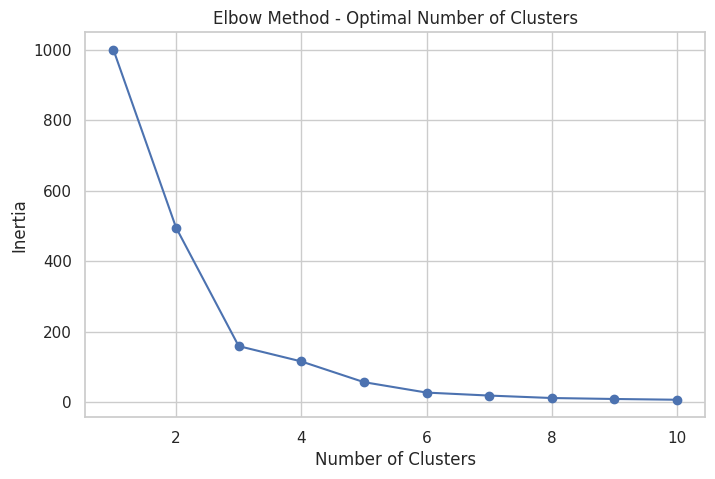

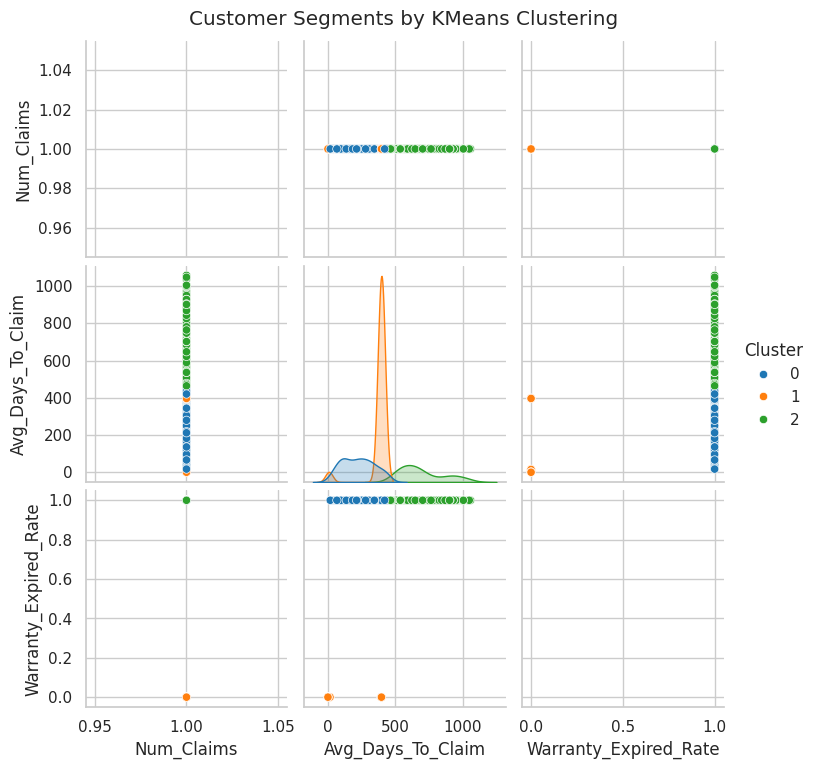

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Phase 5: Customer Segmentation (Clustering)

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

%matplotlib inline
sns.set(style="whitegrid")

# 2. Upload and Load the Processed File
uploaded = files.upload()  # Upload warranty_final.csv
df = pd.read_csv('warranty_final.csv')

# 3. Prepare and Clean Data
# Convert Days_To_Claim to numeric (in case of string errors)
df['Days_To_Claim'] = pd.to_numeric(df['Days_To_Claim'], errors='coerce')
df['Warranty_Expired'] = df['Warranty_Expired'].astype(float)

# Add a dummy column to count number of claims
df['Claim_Flag'] = 1

# Group by Customer_ID and aggregate metrics
customer_df = df.groupby('Customer_ID').agg({
    'Claim_Flag': 'sum',
    'Days_To_Claim': 'mean',
    'Warranty_Expired': 'mean'
}).reset_index()

# Rename columns
customer_df.rename(columns={
    'Claim_Flag': 'Num_Claims',
    'Days_To_Claim': 'Avg_Days_To_Claim',
    'Warranty_Expired': 'Warranty_Expired_Rate'
}, inplace=True)

# 4. Handle any missing values in the aggregated features
customer_df['Avg_Days_To_Claim'] = customer_df['Avg_Days_To_Claim'].fillna(customer_df['Avg_Days_To_Claim'].mean())
customer_df['Warranty_Expired_Rate'] = customer_df['Warranty_Expired_Rate'].fillna(customer_df['Warranty_Expired_Rate'].mean())

# 5. Normalize the Features
features = ['Num_Claims', 'Avg_Days_To_Claim', 'Warranty_Expired_Rate']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[features])

# 6. Elbow Method to Find Optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 7. Apply KMeans Clustering (Set k after looking at the elbow plot)
k = 3  # Change this based on your elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

# 8. Visualize Clusters
sns.pairplot(customer_df, hue='Cluster', vars=features, palette='tab10')
plt.suptitle("Customer Segments by KMeans Clustering", y=1.02)
plt.show()

# 9. Save the Segmented Customers
customer_df.to_csv('customer_segments.csv', index=False)
files.download('customer_segments.csv')
